# Which is the Best Neighbirdhood?

## By Ann Wang (anw152@pitt.edu), Aakash Arvapalli (aaa240@pitt.edu), and Kyle Harwick (KCH45@pitt.edu)

### Introduction

When we set out on deciding what to choose as our metric for what is the best neighborhood in the great City of Pittsburgh, we wanted to pick something that no one had done before and something that would be fun. Choosing the best neighborhood for humans would be too easy, too overdone, since the clear correct answer would be beautiful and clean South Oakland. Choosing the best neighborhood for a bird, however, would be much more interesting, since their standards of living much differ from ours. Birds could (hypothetically) greatly benefit from our findings to quickly and efficiently find the best place to stay in PGH. Therefore, we pose the question: Which is the Best Neighbirdhood?


### Overall Metric: The best place for a bird to live in Pittsburgh

We decided to measure this in three primary ways: number of Water Features (what bird doesn't love a good swim?), number of trees (they need a tree to live in of course), and the number (or lack there of) of fires.

Data sets utilized for this project:

1. [City of Pittsburgh Water Features](https://data.wprdc.org/dataset/city-water-features)

   Water fountains, spray fountains and other assets which provide water for public use.
   
2. [City of Pittsburgh Trees](https://data.wprdc.org/dataset/city-trees)

    Trees cared for and managed by the City of Pittsburgh Department of Public Works Forestry Division.

3. [Fire Incidents in City of Pittsburgh](https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh)

    Incidents of fire responded to by the Pittsburgh Bureau of Fire.

4. [Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2)

    Pittsburgh Neighborhoods

### Submetric 1: Water Features

#### Kyle Harwick

Let's start by loading in pandas/geopandas and the Pittsburgh neighborhood geoJSON file, and double check that it was properly loaded.

In [52]:
import pandas as pd
import geopandas as gpd

neighborhoods_geo = gpd.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/4af8e160-57e9-4ebf-a501-76ca1b42fc99/download/pittsburghpaneighborhoods-.geojson")

neighborhoods_geo.head(3)


,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_user,created_date,last_edited_user,last_edited_date,temp,pghdb_sde_Neighborhood_2010_are,GlobalID,Shape__Area,Shape__Length,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:13,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:41,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14T12:57:28,SDE,2020-08-14T12:59:55,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."


Now we will also load in the water features geoJSON file, and double check that that was inputted correctly.

In [53]:
wf_geo = gpd.read_file("https://data.wprdc.org/dataset/fe7cfb11-9f33-4590-a5ee-04419f3f974a/resource/f7c252a5-28be-43ab-95b5-f3eb0f1eef67/download/wf_img.geojson")

wf_geo.head(3)

,name,control_type,feature_type,make,id,image,geometry
0,Able Long Park,Continuous,Drinking Fountain,Regular Fountain,1816791851,https://tools.wprdc.org/images/pittsburgh/wate...,POINT Z (-80.02833 40.40844 1816791851.00000)
1,Albert Turk Graham Park,On/Off,Drinking Fountain,Most Dependable,1599892422,https://tools.wprdc.org/images/pittsburgh/wate...,POINT Z (-79.98406 40.44045 1599892422.00000)
2,Allegheny Commons,On/Off,Drinking Fountain,Most Dependable,768100943,,POINT Z (-80.00306 40.45570 768100943.00000)


Now let's create a data frame to better digest the information we need, as well as to better utilize later. We will be adding "Feature_Count" and "Rank", which will come into play later. Once again we will display the first three to double check that everything is in order.

In [54]:
locations = pd.DataFrame(columns = ["Neighborhoods","Geometry","Feature_Count"])
locations["Neighborhoods"] = neighborhoods_geo["hood"]
locations["Geometry"] = neighborhoods_geo["geometry"]
locations["Feature_Count"] = 0
locations["Rank"] = 0

locations.head(3)

,Neighborhoods,Geometry,Feature_Count,Rank
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",0,0
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",0,0
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",0,0


Now we will iterate through both the Neighborhood and Water Features geographic data. We will create points for each data point of the Water Features, and search through each Neighborhood's shape data to see if they are within, thus adding one to the Feature_Count column for that Neighborhood.

In [55]:
from shapely.geometry import Point

for i, feature in wf_geo.iterrows():
    point = Point(feature["geometry"])
    for j, location in locations.iterrows():
        if location["Geometry"].contains(point):
            locations.at[j,"Feature_Count"] = location["Feature_Count"] + 1
            break
locations.head(3)

,Neighborhoods,Geometry,Feature_Count,Rank
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",1,0
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",1,0
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",3,0


Now we will sort in a descending way, and assign chronologically a rank to each Neighborhood, with 1 being the best.

In [56]:
amounts_sorted = locations.sort_values("Feature_Count", ascending=False)
rank = 1
    
for f, sort in amounts_sorted.iterrows():
        amounts_sorted.at[f,"Rank"] = rank
        rank = rank + 1
    
amounts_sorted.head(10)
    

,Neighborhoods,Geometry,Feature_Count,Rank
80,Squirrel Hill South,"POLYGON ((-79.94475 40.44101, -79.94405 40.440...",14,1
36,Highland Park,"POLYGON ((-79.91356 40.48644, -79.91354 40.486...",12,2
24,Brookline,"POLYGON ((-80.00172 40.40193, -80.00171 40.401...",8,3
45,Allegheny Center,"POLYGON ((-80.00120 40.45035, -80.00132 40.450...",7,4
15,Perry North,"POLYGON ((-80.01903 40.49754, -80.01788 40.497...",7,5
54,Mount Washington,"POLYGON ((-79.99927 40.42915, -79.99927 40.429...",6,6
87,Elliott,"POLYGON ((-80.02795 40.44463, -80.02806 40.444...",6,7
86,Terrace Village,"POLYGON ((-79.95848 40.44846, -79.95849 40.448...",6,8
51,Carrick,"POLYGON ((-79.99194 40.40719, -79.99191 40.407...",6,9
11,East Liberty,"POLYGON ((-79.91580 40.46081, -79.91577 40.460...",6,10


Finally, I will visualize the data we have just collected. The first is a bar graph, which shows the spread of the 25 Neighborhoods with the highest Feature_Counts. Furthermore, for aesthetic purposes, I also decided to plot these Neighborhoods on a map, which is seen at the bottom.

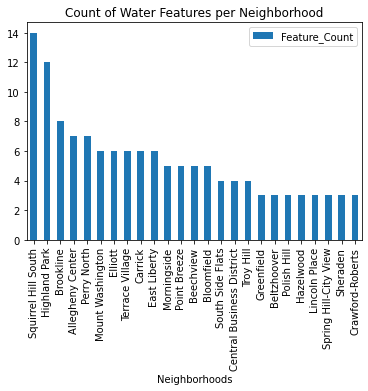

In [57]:
plot = amounts_sorted.iloc[:25].plot(kind='bar',x="Neighborhoods",y="Feature_Count",title="Count of Water Features per Neighborhood")


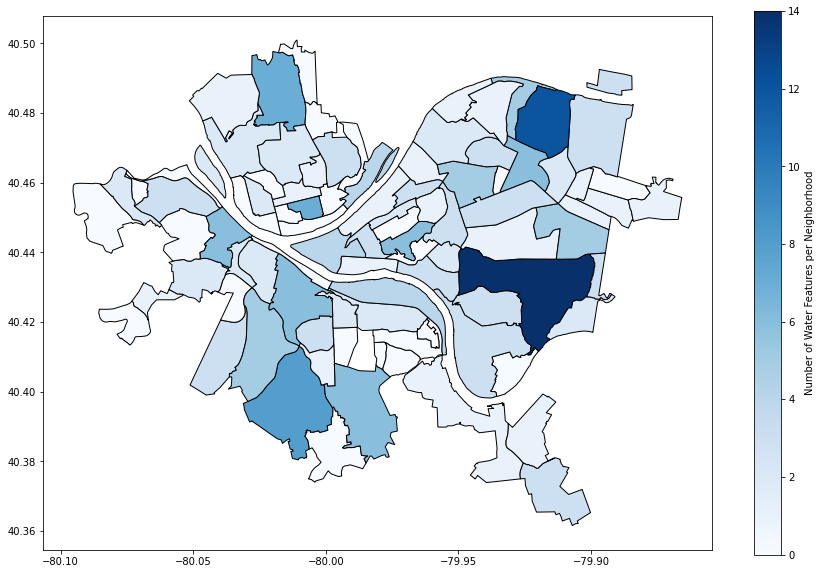

In [58]:
neighborhoods_geo["Features"] = locations["Feature_Count"]

neighborhoods_geo.plot(column="Features", cmap = 'Blues', edgecolor='black', legend=True, legend_kwds = {'label': "Number of Water Features per Neighborhood"}, figsize=(15,10))

### Submetric 2: Fire Incidents

#### Aakash Arvapalli

Loading data

In [59]:
import pandas as pd
import geopandas as gpda
from matplotlib import pyplot as plt
import numpy as np

Read in information from the csv file

In [60]:
fire = pd.read_csv("fire.csv")
fire.head()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


isolate only the relevant columns of our data frame, which include the type_description of the fire event and the neighborhood each fire was reported


In [61]:
neighborhoods = pd.DataFrame(columns = ["type_description", "neighborhood"])
neighborhoods["type_description"] = fire["type_description"]
neighborhoods["neighborhood"] = fire["neighborhood"]

neighborhoods.head()

,type_description,neighborhood
0,Building fire,NaN
1,Building fire,NaN
2,Passenger vehicle fire,NaN
3,Passenger vehicle fire,Fineview
4,Building fire,Fairywood


Drop the not applicable values as they dont provide any information

In [62]:
neighborhoods = neighborhoods.dropna()

Then we want to print out all the neighborhood names and we want to separate by unique because we don't want duplicates

In [63]:
print(len(neighborhoods['neighborhood'].unique()))
print(neighborhoods['neighborhood'].unique())

91
['Fineview' 'Fairywood' 'South Side Flats' 'Allegheny Center'
 'Lincoln-Lemington-Belmar' 'Carrick' 'Beechview' 'Allentown'
 'Beltzhoover' 'Crafton Heights' 'Homewood North' 'Squirrel Hill South'
 'Perry North' 'Bedford Dwellings' 'Homewood South' 'East Allegheny'
 'Crawford-Roberts' 'Sheraden' 'Middle Hill' 'Strip District' 'East Hills'
 'Garfield' 'Greenfield' 'North Shore' 'Spring Hill-City View'
 'Central Business District' 'Upper Hill' 'Manchester' 'Overbrook'
 'Polish Hill' 'Central Lawrenceville' 'Brookline' 'Marshall-Shadeland'
 'North Oakland' 'South Oakland' 'Homewood West' 'East Liberty'
 'Hazelwood' 'Squirrel Hill North' 'Friendship' 'West Oakland'
 'Terrace Village' 'Brighton Heights' 'Troy Hill' 'Windgap' 'Knoxville'
 'Upper Lawrenceville' 'Arlington' 'Elliott' 'South Side Slopes'
 'Bloomfield' 'Perry South' 'Central Northside' 'Point Breeze' 'Bluff'
 'Mount Washington' 'Point Breeze North' 'Swisshelm Park' 'Banksville'
 'Shadyside' 'Spring Garden' 'Regent Square' 'All

This allows us to group the neighborhoods and the type_description by specifically seeing the number of instances of each type of fire

In [64]:
grouped_neighborhoods = neighborhoods.groupby('neighborhood')['type_description'].value_counts()
grouped_neighborhoods

neighborhood      type_description                               
Allegheny Center  Cooking fire, confined to container                17
                  Outside rubbish, trash or waste fire                7
                  Brush or brush-and-grass mixture fire               6
                  Dumpster or other outside trash receptacle fire     5
                  Natural vegetation fire, Other                      5
                                                                     ..
Windgap           Mobile property (vehicle) fire, Other               1
                  Natural vegetation fire, Other                      1
                  Outside rubbish, trash or waste fire                1
                  Special outside fire, Other                         1
                  Trash or rubbish fire, contained                    1
Name: type_description, Length: 1269, dtype: int64

Adding to a dictionary for further use and manipulation of the data

In [65]:
neighborhood_dict = grouped_neighborhoods.to_dict()
neighborhood_dict

{('Allegheny Center', 'Cooking fire, confined to container'): 17,
 ('Allegheny Center', 'Outside rubbish, trash or waste fire'): 7,
 ('Allegheny Center', 'Brush or brush-and-grass mixture fire'): 6,
 ('Allegheny Center', 'Dumpster or other outside trash receptacle fire'): 5,
 ('Allegheny Center', 'Natural vegetation fire, Other'): 5,
 ('Allegheny Center', 'Passenger vehicle fire'): 5,
 ('Allegheny Center', 'Outside rubbish fire, Other'): 3,
 ('Allegheny Center', 'Special outside fire, Other'): 3,
 ('Allegheny Center', 'Trash or rubbish fire, contained'): 3,
 ('Allegheny Center', 'Building fire'): 2,
 ('Allegheny Center', 'Fire in portable building, fixed location'): 1,
 ('Allegheny Center', 'Fire, Other'): 1,
 ('Allegheny Center', 'Fuel burner/boiler malfunction, fire confined'): 1,
 ('Allegheny Center', 'Mobile property (vehicle) fire, Other'): 1,
 ('Allegheny Center', 'Outside equipment fire'): 1,
 ('Allegheny West', 'Passenger vehicle fire'): 11,
 ('Allegheny West', 'Building fire')

In [66]:
items = dict()
for index, row in neighborhoods.iterrows():
    if row['type_description'] not in items:
        items[row['type_description']] = 1
    else:
        items[row['type_description']] += 1

items['Cooking fire, confined to container'] *= 1.5
items['Building fire'] *= 1.5
items['Outside rubbish, trash or waste fire'] *= 1.5

This goes through and lists the number of times each type_description occured. I wanted to highlight the value of cooking fires, building fires, and outside trash because these would drive out birds to the greatest extent

In [67]:
items

{'Passenger vehicle fire': 857,
 'Building fire': 2491.5,
 'Outside rubbish fire, Other': 446,
 'Cooking fire, confined to container': 2727.0,
 'Outside rubbish, trash or waste fire': 955.5,
 'Trash or rubbish fire, contained': 367,
 'Brush or brush-and-grass mixture fire': 444,
 'Special outside fire, Other': 202,
 'Mobile property (vehicle) fire, Other': 163,
 'Fuel burner/boiler malfunction, fire confined': 55,
 'Fires in structure other than in a building': 120,
 'Off-road vehicle or heavy equipment fire': 13,
 'Outside equipment fire': 59,
 'Fire, Other': 102,
 'Garbage dump or sanitary landfill fire': 5,
 'Dumpster or other outside trash receptacle fire': 372,
 'Grass fire': 110,
 'Chimney or flue fire, confined to chimney or flue': 43,
 'Natural vegetation fire, Other': 217,
 'Commercial Compactor fire, confined to rubbish': 12,
 'Self-propelled motor home or recreational vehicle': 1,
 'Outside storage fire': 17,
 'Construction or demolition landfill fire': 18,
 'Forest, woods o

Then we sort the list by ascending order and giving each neighborhood a number of occuring fire incidents

In [68]:
incidents_per_neighborhood = neighborhoods.groupby('neighborhood').size().sort_values(ascending=True).reset_index(name='count')
sorted_list = incidents_per_neighborhood[['neighborhood', 'count']].values.tolist()


In [69]:
sorted_list

[['Mount Oliver Borough', 6],
 ['Regent Square', 9],
 ['Mt. Oliver', 11],
 ['East Carnegie', 11],
 ['St. Clair', 11],
 ['Ridgemont', 12],
 ['Arlington Heights', 13],
 ['Oakwood', 13],
 ['Chartiers City', 15],
 ['Swisshelm Park', 16],
 ['Bon Air', 19],
 ['Hays', 20],
 ['Glen Hazel', 20],
 ['Windgap', 20],
 ['West End', 20],
 ['Summer Hill', 21],
 ['New Homestead', 21],
 ['Esplen', 22],
 ['Spring Garden', 23],
 ['South Shore', 23],
 ['Fairywood', 24],
 ['Westwood', 26],
 ['Friendship', 30],
 ['Morningside', 32],
 ['California-Kirkbride', 38],
 ['Polish Hill', 38],
 ['Duquesne Heights', 39],
 ['Chateau', 40],
 ['Allegheny West', 42],
 ['Bedford Dwellings', 42],
 ['Upper Hill', 44],
 ['Fineview', 46],
 ['Point Breeze North', 49],
 ['Upper Lawrenceville', 50],
 ['Arlington', 50],
 ['Lower Lawrenceville', 53],
 ['Overbrook', 55],
 ['Stanton Heights', 55],
 ['Banksville', 58],
 ['Strip District', 58],
 ['West Oakland', 58],
 ['Homewood West', 59],
 ['Lincoln Place', 59],
 ['Allegheny Center',

We want to finally take the top 20 neighborhoods and plot on a graph to see in increasing order the safest ones in terms of fire occurances

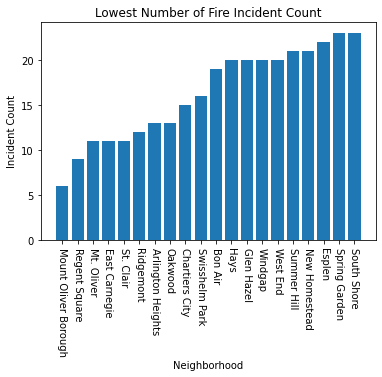

In [70]:
# Get the top 20 neighborhoods
top_20_neighborhoods = sorted_list[:20]

# Create a bar graph
x = [neighborhood for neighborhood, count in top_20_neighborhoods]
y = [count for neighborhood, count in top_20_neighborhoods]
plt.bar(x, y)

# Set the labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Incident Count')
plt.title('Lowest Number of Fire Incident Count')

# Flip the tick labels vertically
plt.xticks(rotation=270)

# Show the plot
plt.show()




In [71]:
top_10_neighborhoods = sorted_list[:10]

This is the final list of the top 10 safest neighborhoods in terms of fire instances

In [72]:
top_10_neighborhoods

[['Mount Oliver Borough', 6],
 ['Regent Square', 9],
 ['Mt. Oliver', 11],
 ['East Carnegie', 11],
 ['St. Clair', 11],
 ['Ridgemont', 12],
 ['Arlington Heights', 13],
 ['Oakwood', 13],
 ['Chartiers City', 15],
 ['Swisshelm Park', 16]]

# Submetric 3: Addressing the Avian Housing Crisis

In [73]:
import pandas as pd
import geopandas as gpda
from matplotlib import pyplot as plt
import numpy as np

Let's load our data.

In [74]:
trees = pd.read_csv("trees.csv")
trees.head()

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428.0,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220.0,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822.0,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608.0,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135.0,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106


Now we want to isolate only the relevant columns of our data frame, which include the tree IDs, the neighborhood each tree is situated in, and the trees' growth spaces.

In [75]:
neighborhoods = pd.DataFrame(columns = ["id", "neighborhood", "growth space"])
neighborhoods["id"] = trees["id"]
neighborhoods["neighborhood"] = trees["neighborhood"]
neighborhoods["growth space"] = trees["growth_space_length"] * trees["growth_space_width"]

neighborhoods.head()

,id,neighborhood,growth space
0,754166088,Homewood North,20.0
1,1946899269,Oakwood,9801.0
2,1431517397,South Side Flats,18.0
3,994063598,East Allegheny,9.0
4,1591838573,Highland Park,9801.0


We want to get rid of any rows with NaN as a value, so they don't mess with our data manipulations

In [76]:
neighborhoods = neighborhoods.dropna()

Let's see how many neighborhoods are included in our dataset, and which neighborhoods they are.

In [77]:
print(len(neighborhoods['neighborhood'].unique()))
print(neighborhoods['neighborhood'].unique())

87
['Homewood North' 'Oakwood' 'South Side Flats' 'East Allegheny'
 'Highland Park' 'Sheraden' 'Chartiers City' 'Elliott' 'Stanton Heights'
 'Morningside' 'Bloomfield' 'Friendship' 'Garfield' 'Polish Hill'
 'Lower Lawrenceville' 'Central Northside' 'East Liberty'
 'Central Lawrenceville' 'Shadyside' 'Allegheny Center' 'Homewood South'
 'Point Breeze North' 'East Hills' 'Homewood West' 'Greenfield'
 'Hazelwood' 'Squirrel Hill South' 'Marshall-Shadeland' 'Brighton Heights'
 'North Shore' 'Overbrook' 'Knoxville' 'Brookline' 'South Side Slopes'
 'Arlington' 'Arlington Heights' 'Carrick' 'Bedford Dwellings'
 'Central Business District' 'Bluff' 'West Oakland' 'South Oakland'
 'Squirrel Hill North' 'Point Breeze' 'Lincoln-Lemington-Belmar' 'Bon Air'
 'Mount Washington' 'California-Kirkbride' 'New Homestead'
 'Central Oakland' 'Crafton Heights' 'Beechview' 'Manchester' 'Allentown'
 'Beltzhoover' 'Allegheny West' 'Chateau' 'Duquesne Heights' 'Perry North'
 'Perry South' 'Middle Hill' 'Troy Hill

Now I want to see the average growth space of trees in each neighborhood to see how spacious our trees are for our birds.

In [78]:
result = neighborhoods.groupby('neighborhood',as_index=False)['growth space'].mean()
result

,neighborhood,growth space
0,Allegheny Center,27.333333
1,Allegheny West,91.068966
2,Allentown,28.641026
3,Arlington,5453.416667
4,Arlington Heights,9801.000000
...,...,...
82,Upper Lawrenceville,2193.698413
83,West End,494.536585
84,West Oakland,2963.222222
85,Westwood,8834.157143


Here I convert our dataframe to a dictionary for future purposes.

In [79]:
result_dict = dict(result.values)

In [80]:
result_dict

{'Allegheny Center': 27.333333333333332,
 'Allegheny West': 91.06896551724138,
 'Allentown': 28.641025641025642,
 'Arlington': 5453.416666666667,
 'Arlington Heights': 9801.0,
 'Banksville': 8849.322580645161,
 'Bedford Dwellings': 3746.851063829787,
 'Beechview': 5929.204968944099,
 'Beltzhoover': 1235.142857142857,
 'Bloomfield': 479.1154684095861,
 'Bluff': 94.47272727272727,
 'Bon Air': 9801.0,
 'Brighton Heights': 3441.8174904942966,
 'Brookline': 5428.33628318584,
 'California-Kirkbride': 1920.1764705882354,
 'Carrick': 5681.696774193549,
 'Central Business District': 975.4,
 'Central Lawrenceville': 55.04907975460123,
 'Central Northside': 794.0880281690141,
 'Central Oakland': 1854.0892857142858,
 'Chartiers City': 9801.0,
 'Chateau': 992.5370370370371,
 'Crafton Heights': 5717.59405940594,
 'Crawford-Roberts': 318.9526627218935,
 'Duquesne Heights': 452.0,
 'East Allegheny': 500.38235294117646,
 'East Carnegie': 9801.0,
 'East Hills': 8316.066666666668,
 'East Liberty': 2167.2

Let's sort this dictionary by growth space so we can see which neighborhood has the most spacious trees.

In [81]:
sorted_results = dict(sorted(result_dict.items(), key=lambda x:x[1], reverse=True)[0:20])
sorted_results

{'Arlington Heights': 9801.0,
 'Bon Air': 9801.0,
 'Chartiers City': 9801.0,
 'East Carnegie': 9801.0,
 'Esplen': 9801.0,
 'New Homestead': 9801.0,
 'St. Clair': 9801.0,
 'Overbrook': 8934.679487179486,
 'Summer Hill': 8897.4,
 'Banksville': 8849.322580645161,
 'Westwood': 8834.157142857142,
 'Lincoln Place': 8702.652173913044,
 'Knoxville': 8642.142857142857,
 'East Hills': 8316.066666666668,
 'Fairywood': 8299.5,
 'Oakwood': 8274.315789473685,
 'Stanton Heights': 7890.005076142132,
 'Swisshelm Park': 7864.304347826087,
 'Fineview': 6951.35,
 'Lincoln-Lemington-Belmar': 6517.707142857143}

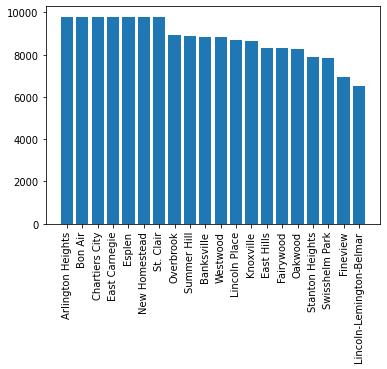

In [82]:
names = list(sorted_results.keys())
values = list(sorted_results.values())

plt.bar(range(20), values, tick_label=names)
plt.xticks(range(20), names, rotation='vertical')
plt.show()

But I also care about the number of trees per neighborhood. Some birds are introverts, and like having their own trees rather than big trees that they have to share with others. So let's collect our counts.

In [83]:
items = dict()
for index, row in neighborhoods.iterrows():
    if row['neighborhood'] not in items:
        items[row['neighborhood']] = 1
    else:
        items[row['neighborhood']] += 1

Helloooo alphabetical order.

In [84]:
sorted(items.items())

[('Allegheny Center', 6),
 ('Allegheny West', 58),
 ('Allentown', 39),
 ('Arlington', 36),
 ('Arlington Heights', 1),
 ('Banksville', 93),
 ('Bedford Dwellings', 47),
 ('Beechview', 161),
 ('Beltzhoover', 42),
 ('Bloomfield', 459),
 ('Bluff', 55),
 ('Bon Air', 25),
 ('Brighton Heights', 263),
 ('Brookline', 226),
 ('California-Kirkbride', 34),
 ('Carrick', 155),
 ('Central Business District', 380),
 ('Central Lawrenceville', 163),
 ('Central Northside', 284),
 ('Central Oakland', 56),
 ('Chartiers City', 8),
 ('Chateau', 54),
 ('Crafton Heights', 101),
 ('Crawford-Roberts', 169),
 ('Duquesne Heights', 24),
 ('East Allegheny', 102),
 ('East Carnegie', 1),
 ('East Hills', 135),
 ('East Liberty', 469),
 ('Elliott', 48),
 ('Esplen', 1),
 ('Fairywood', 6),
 ('Fineview', 20),
 ('Friendship', 173),
 ('Garfield', 287),
 ('Greenfield', 197),
 ('Hazelwood', 176),
 ('Highland Park', 331),
 ('Homewood North', 157),
 ('Homewood South', 162),
 ('Homewood West', 31),
 ('Knoxville', 91),
 ('Larimer', 

In [85]:
sorted_counts = dict(sorted(items.items(), key=lambda x:x[1], reverse=True)[0:20])
sorted_counts

{'Squirrel Hill South': 487,
 'East Liberty': 469,
 'Bloomfield': 459,
 'South Side Flats': 437,
 'Shadyside': 416,
 'Central Business District': 380,
 'Squirrel Hill North': 378,
 'Highland Park': 331,
 'Garfield': 287,
 'Central Northside': 284,
 'Brighton Heights': 263,
 'Point Breeze': 256,
 'Strip District': 235,
 'Mount Washington': 230,
 'Brookline': 226,
 'Manchester': 204,
 'Stanton Heights': 197,
 'Lower Lawrenceville': 197,
 'Greenfield': 197,
 'Hazelwood': 176}

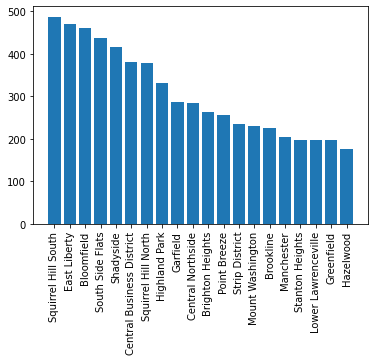

In [86]:
names2 = list(sorted_counts.keys())
values2 = list(sorted_counts.values())

plt.bar(range(20), values2, tick_label=names2)
plt.xticks(range(20), names2, rotation='vertical')
plt.show()

To get our final ranking, I want to get the total growth space for a neighborhood (growth space * number of trees), add some additional weight for number of trees per neighborhood for the introvert birds. 

In [87]:
weighted_dict = dict()
for key,value in sorted(items.items()):
    weighted_dict[key] = (value * result_dict[key] * 0.3) + (value * 0.7)

In [88]:
final_list = sorted(weighted_dict.items(), key=lambda x:x[1], reverse=True)

In [89]:
final_list[0:10]

[('Stanton Heights', 466437.2),
 ('Squirrel Hill North', 390773.39999999997),
 ('Squirrel Hill South', 381218.8),
 ('Brookline', 368199.4),
 ('East Hills', 336895.2),
 ('East Liberty', 305256.99999999994),
 ('Beechview', 286493.3),
 ('Lincoln-Lemington-Belmar', 273841.7),
 ('Brighton Heights', 271743.49999999994),
 ('Carrick', 264307.39999999997)]

In [90]:
ranked = dict()
rank = 0
for i in final_list:
    rank = rank + 1
    ranked[i[0]] = rank
    
ranked

{'Stanton Heights': 1,
 'Squirrel Hill North': 2,
 'Squirrel Hill South': 3,
 'Brookline': 4,
 'East Hills': 5,
 'East Liberty': 6,
 'Beechview': 7,
 'Lincoln-Lemington-Belmar': 8,
 'Brighton Heights': 9,
 'Carrick': 10,
 'Banksville': 11,
 'Greenfield': 12,
 'Hazelwood': 13,
 'Knoxville': 14,
 'Point Breeze': 15,
 'Overbrook': 16,
 'Highland Park': 17,
 'Westwood': 18,
 'Marshall-Shadeland': 19,
 'Lincoln Place': 20,
 'Crafton Heights': 21,
 'Swisshelm Park': 22,
 'Homewood North': 23,
 'Shadyside': 24,
 'South Side Flats': 25,
 'New Homestead': 26,
 'Garfield': 27,
 'Homewood South': 28,
 'Central Business District': 29,
 'Strip District': 30,
 'Perry North': 31,
 'North Oakland': 32,
 'Polish Hill': 33,
 'Sheraden': 34,
 'Bon Air': 35,
 'South Side Slopes': 36,
 'Perry South': 37,
 'Central Northside': 38,
 'Bloomfield': 39,
 'Larimer': 40,
 'Morningside': 41,
 'Arlington': 42,
 'Point Breeze North': 43,
 'Summer Hill': 44,
 'Bedford Dwellings': 45,
 'Middle Hill': 46,
 'Elliott': 4

# Metric Consolidation: Rank Addition Rating (RAR)

In [99]:
# add ranks
#water features = amounts_sorted
#fire incidents = top_10_neighborhoods
#trees = ranked

In [93]:
waterDict = pd.Series(amounts_sorted.Rank.values,index=amounts_sorted.Neighborhoods).to_dict()

In [95]:
fire_ranked = dict()
fire_rank = 0
for i in sorted_list:
    fire_rank = fire_rank + 1
    fire_ranked[i[0]] = fire_rank
    
fire_ranked

{'Mount Oliver Borough': 1,
 'Regent Square': 2,
 'Mt. Oliver': 3,
 'East Carnegie': 4,
 'St. Clair': 5,
 'Ridgemont': 6,
 'Arlington Heights': 7,
 'Oakwood': 8,
 'Chartiers City': 9,
 'Swisshelm Park': 10,
 'Bon Air': 11,
 'Hays': 12,
 'Glen Hazel': 13,
 'Windgap': 14,
 'West End': 15,
 'Summer Hill': 16,
 'New Homestead': 17,
 'Esplen': 18,
 'Spring Garden': 19,
 'South Shore': 20,
 'Fairywood': 21,
 'Westwood': 22,
 'Friendship': 23,
 'Morningside': 24,
 'California-Kirkbride': 25,
 'Polish Hill': 26,
 'Duquesne Heights': 27,
 'Chateau': 28,
 'Allegheny West': 29,
 'Bedford Dwellings': 30,
 'Upper Hill': 31,
 'Fineview': 32,
 'Point Breeze North': 33,
 'Upper Lawrenceville': 34,
 'Arlington': 35,
 'Lower Lawrenceville': 36,
 'Overbrook': 37,
 'Stanton Heights': 38,
 'Banksville': 39,
 'Strip District': 40,
 'West Oakland': 41,
 'Homewood West': 42,
 'Lincoln Place': 43,
 'Allegheny Center': 44,
 'Northview Heights': 45,
 'North Shore': 46,
 'Elliott': 47,
 'Point Breeze': 48,
 'Cent

In [96]:
dict_add = dict()
for key in waterDict:
    if (key in ranked) and (key in fire_ranked):
        dict_add[key] = waterDict[key] + ranked[key] + fire_ranked[key]
    else:
        pass
dict_add

{'Squirrel Hill South': 92,
 'Highland Park': 71,
 'Brookline': 89,
 'Allegheny Center': 134,
 'Perry North': 98,
 'Mount Washington': 142,
 'Elliott': 101,
 'Terrace Village': 111,
 'Carrick': 110,
 'East Liberty': 101,
 'Morningside': 76,
 'Point Breeze': 75,
 'Beechview': 93,
 'Bloomfield': 131,
 'South Side Flats': 129,
 'Central Business District': 135,
 'Troy Hill': 143,
 'Greenfield': 93,
 'Beltzhoover': 155,
 'Polish Hill': 79,
 'Hazelwood': 121,
 'Lincoln Place': 85,
 'Spring Hill-City View': 136,
 'Sheraden': 135,
 'Crawford-Roberts': 146,
 'South Oakland': 134,
 'Regent Square': 87,
 'North Oakland': 124,
 'Shadyside': 133,
 'Garfield': 118,
 'Lincoln-Lemington-Belmar': 123,
 'Banksville': 82,
 'Central Oakland': 144,
 'Central Lawrenceville': 164,
 'West End': 122,
 'Bedford Dwellings': 111,
 'South Side Slopes': 130,
 'Swisshelm Park': 70,
 'Manchester': 162,
 'Perry South': 153,
 'Marshall-Shadeland': 131,
 'Allentown': 192,
 'Windgap': 113,
 'Larimer': 151,
 'Duquesne He

In [97]:
final_final = sorted(dict_add.items(), key=lambda x:x[1])
final_final

[('Swisshelm Park', 70),
 ('Highland Park', 71),
 ('Point Breeze', 75),
 ('Morningside', 76),
 ('Polish Hill', 79),
 ('Banksville', 82),
 ('Lincoln Place', 85),
 ('Westwood', 86),
 ('Regent Square', 87),
 ('Brookline', 89),
 ('Stanton Heights', 90),
 ('Squirrel Hill South', 92),
 ('Beechview', 93),
 ('Greenfield', 93),
 ('Perry North', 98),
 ('Elliott', 101),
 ('East Liberty', 101),
 ('New Homestead', 105),
 ('Carrick', 110),
 ('Bon Air', 110),
 ('Terrace Village', 111),
 ('Bedford Dwellings', 111),
 ('Windgap', 113),
 ('Oakwood', 116),
 ('Strip District', 117),
 ('Garfield', 118),
 ('Hazelwood', 121),
 ('West End', 122),
 ('Lincoln-Lemington-Belmar', 123),
 ('North Oakland', 124),
 ('Squirrel Hill North', 127),
 ('Point Breeze North', 128),
 ('South Side Flats', 129),
 ('South Side Slopes', 130),
 ('East Hills', 130),
 ('Bloomfield', 131),
 ('Marshall-Shadeland', 131),
 ('Shadyside', 133),
 ('Allegheny Center', 134),
 ('South Oakland', 134),
 ('Summer Hill', 134),
 ('Central Business 

# Winner: Swisshelm Park!

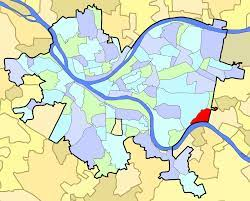

# Conclusion

 Reflect on how the data driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. 